In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [65]:
iris_data = pd.read_csv("Iris.csv")

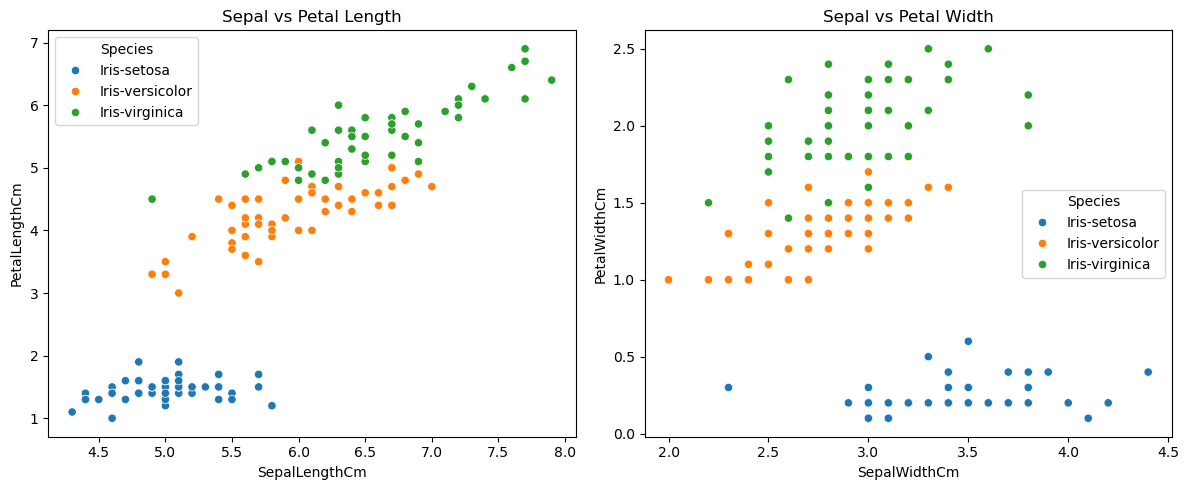

In [66]:
# Create a figure with 1 row and 2 columns
fig,axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Sepal Length vs Petal Length
sns.scatterplot(
    data=iris_data, 
    x="SepalLengthCm", 
    y="PetalLengthCm", 
    hue="Species", 
    ax=axes[0]
)
axes[0].set_title("Sepal vs Petal Length")

# Plot 2: Sepal Width vs Petal Width
sns.scatterplot(
    data=iris_data, 
    x="SepalWidthCm", 
    y="PetalWidthCm", 
    hue="Species", 
    ax=axes[1]
)
axes[1].set_title("Sepal vs Petal Width")

plt.tight_layout()
plt.show()

In [67]:
# Split the dataset into features (X) and target (y)
X = iris_data.drop("Species", axis=1)
y = iris_data["Species"]

# Partition data into training (75%) and testing (25%) sets
# random_state ensures the split is reproducible every time we run the code
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [68]:
# Create a machine learning pipeline to automate the workflow
# Step 1: Standardize features (Mean=0, StdDev=1) using StandardScaler
# Step 2: Apply the K-Nearest Neighbors (KNN) classifier
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# Define the range of neighbors (k) to test for optimization
params = {"knn__n_neighbors": [3, 5, 7, 9]}

In [69]:
# Use GridSearchCV to find the best 'k' value using 5-fold cross-validation
# It evaluates the model's accuracy for each parameter in 'params'
ClassifierCV = GridSearchCV(
    pipe,
    param_grid=params,
    cv=5,
    scoring="accuracy"
)

# Train the optimized model on the training data
ClassifierCV.fit(X_train, y_train)

# Use the best model to make predictions on the unseen test set
y_pred = ClassifierCV.predict(X_test)

In [70]:
# Print performance metrics to evaluate the model's effectiveness
# Accuracy: Percentage of total correct predictions
print("accuracy score: ", accuracy_score(y_test, y_pred))

# Precision and Recall: Using 'weighted' average to account for class distribution
print("precision score: ", precision_score(y_test, y_pred, average="weighted"))
print("recall score: ", recall_score(y_test, y_pred, average="weighted"))

accuracy score:  1.0
precision score:  1.0
recall score:  1.0


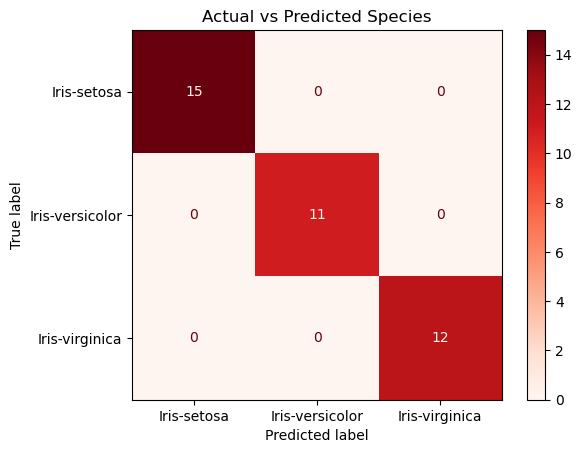

In [71]:
# Generate a confusion matrix to visualize actual vs predicted categories
cm = confusion_matrix(y_test, y_pred)

# Display the matrix as a heatmap for easier interpretation
# It shows correct predictions on the diagonal and errors in the off-diagonal cells
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ClassifierCV.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Actual vs Predicted Species")
plt.show()